<a href="https://colab.research.google.com/github/yogesh1300/Codsoft/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset Loaded Successfully!

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

📊 Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
F

/tmp/ipython-input-2-3554414881.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2-3554414881.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

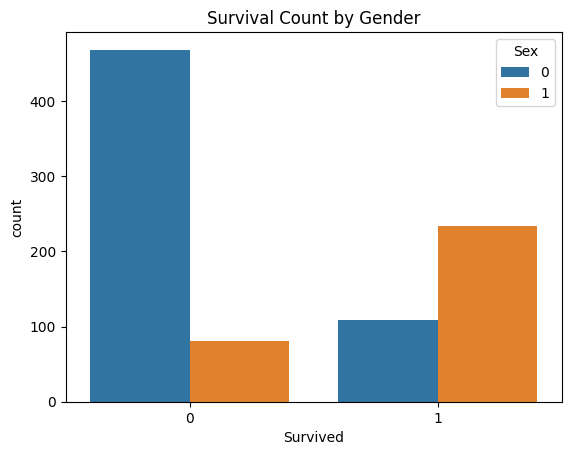

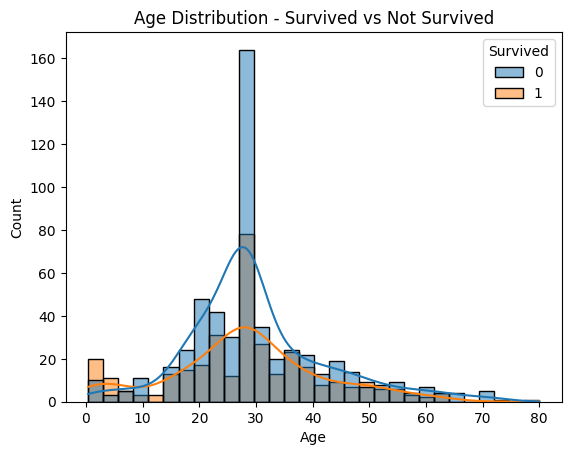

📊 Training Data Shape: (712, 9)
📊 Test Data Shape: (179, 9)
✅ Model Trained Successfully!

🎯 Accuracy: 0.84

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



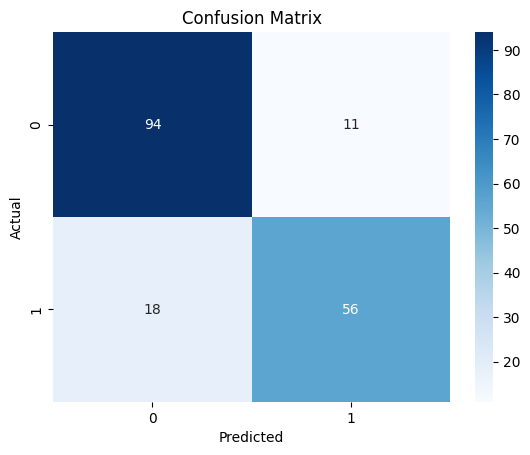

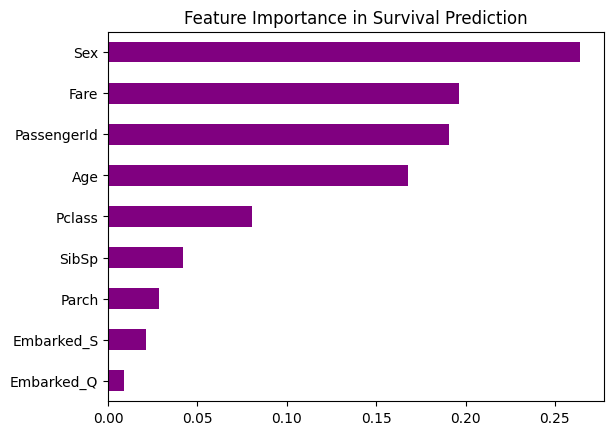

In [ ]:
#  Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Step 2: Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')  # Replace path if needed
print("✅ Dataset Loaded Successfully!\n")
df.head()

#  Step 3: Basic Exploration
print("🔍 Dataset Info:")
print(df.info())
print("\n📊 Missing Values:")
print(df.isnull().sum())
print("\n📈 Statistical Summary:")
print(df.describe())

#  Step 4: Data Cleaning & Preprocessing

# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' using One-Hot Encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print(" Data Cleaned Successfully!\n")
df.head()

#  Step 5: Visualization ( Bonus for Uniqueness)

# Survival count by gender
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survival Count by Gender")
plt.show()

# Age distribution by survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution - Survived vs Not Survived")
plt.show()

#  Step 6: Train-Test Split
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Training Data Shape: {X_train.shape}")
print(f"📊 Test Data Shape: {X_test.shape}")

# Step 7: Model Building & Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("✅ Model Trained Successfully!\n")

#  Step 8: Prediction and Evaluation
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.2f}\n")

# Classification Report
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Step 9: Feature Importance ( Bonus Step)
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=True).plot(kind='barh', color='purple')
plt.title("Feature Importance in Survival Prediction")
plt.show()
